# The shape of things to come

## Topological Data Analysis applied to plant biology

--- 

## Erik Amézquita

Dept of Computational Mathematics, Science & Engineering

Michigan State University

February 2021

# Welcome

This notebook is meant to be a first step introduction to compute Euler Characteristic Curves and the Euler Characteristic Transform for 2D and 3D images.  This repository includes the jupyter notebooks for the [2021 Annual Meeting of the NAPPN](https://www.nappn2021.org/agenda) to be held virtually, led by [Erik Amézquita](http://egr.msu.edu/~amezqui3). This introduction is tailored for a phenotyping plant biology audience, so the focus is on topological tools for image analysis.

These slides are written to be presented as [RISE slides](https://rise.readthedocs.io/en/stable/index.html), however the notebook should be self contained without needing this installed. If you see a lot of weird cell toolbars in the notebook (which are used for controlling the slideshow version), these can be removed from your view of the jupyter notebook by going to View -> Cell Toolbar -> None

# Plan and Goals

- Gentle introduction to Topological Data Analysis (TDA)
- A brief overview of TDA software available
- Focus on the Euler characteristic to efficiently extract shape from very large images (both 2D and 3D)
- Give you a place to start.

# Options to follow along

- Download from the [github repo](https://github.com/amezqui3/ect_and_barley): `https://github.com/amezqui3/ect_and_barley`
- Run directly from [binder](http://bit.ly/tda_for_plants): `bit.ly/tda_for_plants`


- The TDA introduction theory might take us enough time so you can initialize the binder on the background

# Quantify and compare all shape diversity

- Data diversity: morphometrics might not be enough

In [1]:
import IPython.display as display
import ipywidgets as widgets
video1, video2,video3,video4 = widgets.Output(), widgets.Output(),widgets.Output(), widgets.Output()
with video1:
    display.display(display.YouTubeVideo('j0R9mMs5E50', autoplay=True))
with video2:
    display.display(display.YouTubeVideo('4GBgPIEDoa0', autoplay=True))
with video3:
    display.display(display.YouTubeVideo('m5ogcckInwo', autoplay=True))
with video4:
    display.display(display.YouTubeVideo('9ynQ4-NxT3g', autoplay=True))

In [2]:
display.display(widgets.HBox([video1,video2,video3,video4]))

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:white;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-baqh{text-align:left;vertical-align:top}
</style>

# Topological Data Analysis

<table class="tg">

<tbody>
  <tr>
    <td class="tg-baqh" style="text-align:left">
        <img src = "https://www.egr.msu.edu/~amezqui3/barley/figs/S019_L0_1.gif" alt = "barley" style="width:250px;"/>
        <p style="text-align:center;font-size:30px"><strong>Raw Data</strong></p>
        <ul style="font-size:20px">
          <li> X-ray CT </li>
          <li> Point clouds </li>
          <li> Time series </li>
        <ul>
    </td>
    <td class="tg-baqh" style="text-align:left">
        <img src = "https://www.egr.msu.edu/~amezqui3/barley/figs/ecc_X.gif" alt = "Website icon" style="width:330px;"/>
        <p style="text-align:center;font-size:30px"><strong>Topological Summary</strong></p>
        <ul style="font-size:20px">
          <li> Euler Characteristic </li>
          <li> Persistence diagrams </li>
          <li> Mapper/Reeb graphs </li>
        <ul>
    </td>
    <td class="tg-baqh" style="text-align:left">
        <img src="https://www.egr.msu.edu/~amezqui3/barley/figs/svm_mds_ect.gif" alt="NSF Logo" style="width:350px">
        <p style="text-align:center;font-size:30px"><strong>Analysis</strong></p>
        <ul style="font-size:20px">
          <li> Statistics </li>
          <li> Machine learning </li>
          <li> Classification/prediction </li>
        <ul>
    </td>       
  </tr>
</tbody>
</table>

# Main goal of TDA

Provide 
- **Quantifiable**
- **Comparable**
- **Robust**
- **Concise**
summaries of the shape of data

## Shape is data, and data is shape

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:white;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-baqh{text-align:left;vertical-align:top}
</style>


# Two basic ingredients to do TDA

## Data points / Network / Image &rarr; Complexes 

<table class="tg">

<tbody>
  <tr>
    <td class="tg-baqh" style="text-align:left">
        <img src = "https://www.egr.msu.edu/~amezqui3/barley/figs/simplicial_complex.jpg" alt = "barley" style="width:330px;"/>
        <p style="text-align:center;font-size:30px"><strong>Simplicial complex</strong></p>
        <ul style="font-size:20px">
          <li> 3 connected components </li>
          <li> 1 loop </li>
          <li> 1 void </li>
        <ul>
    </td>
    <td class="tg-baqh" style="text-align:left">
        <img src = "https://www.egr.msu.edu/~amezqui3/barley/figs/cubical_complex_example.jpg" alt = "Website icon" style="width:280px;"/>
        <p style="text-align:center;font-size:30px"><strong>Cubical complex</strong></p>
        <ul style="font-size:20px">
          <li> 2 connected components </li>
          <li> 3 loops </li>
          <li> 1 void </li>
        <ul>
    </td>       
  </tr>
</tbody>
</table>

- TDA seeks to describe the **shape** of data based on important **topological features**:
    - Connected components
    - Loops
    - Voids.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:white;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-baqh{text-align:left;vertical-align:top}
</style>

## Filter function: point / pixel &rarr; real number

<table class="tg">

<tbody>
  <tr>
    <td class="tg-baqh" style="text-align:left">
        <img src = "https://www.egr.msu.edu/~amezqui3/barley/figs/eigcurv_filter.gif" alt = "barley" style="width:230px;"/>
        <p style="text-align:center;font-size:20px"><strong>Curvature</strong></p>
    </td>
    <td class="tg-baqh" style="text-align:left">
        <img src = "https://www.egr.msu.edu/~amezqui3/barley/figs/eccentricity_filter.gif" alt = "Website icon" style="width:230px;"/>
        <p style="text-align:center;font-size:20px"><strong>Eccentricity</strong></p>
    </td>
    <td class="tg-baqh" style="text-align:left">
        <img src="https://www.egr.msu.edu/~amezqui3/barley/figs/gaussian_density_filter.gif" alt="NSF Logo" style="width:230px">
        <p style="text-align:center;font-size:20px"><strong>Gaussian Density</strong></p>
    </td>
    <td class="tg-baqh" style="text-align:left">
        <img src="https://www.egr.msu.edu/~amezqui3/barley/figs/vrips_ver2.gif" alt="NSF Logo" style="width:230px">
        <p style="text-align:center;font-size:20px"><strong>Vietoris-Rips</strong></p>
    </td>
  </tr>
</tbody>
</table>

TDA seeks to describe how the topological **features** (number of connected components, loops, voids) **change** as we increase the filter values.

### Plenty of examples in diverse biological contexts

<img src=https://anatomypubs.onlinelibrary.wiley.com/cms/asset/11df627b-bfb5-4d9b-bbc4-b2f8f90eff59/dvdy175-fig-0006-m.jpg width="600">

Amézquita et al. (2020) The shape of things to come: Topological data analysis and biology, from molecules to organisms. [DOI:10.1002/dvdy.175](https://doi.org/10.1002/dvdy.175)

## Applications of TDA to biology

- **Structural biology.** A diagram of RNA secondary structure (left; solid lines covalent bonds, dashed lines hydrogen bonds). Increasing radii of vertices (middle, right; blue points) are used to visualize filtration on Euclidean distance. As radii merge, connected components die. Purple lines indicate the formation of loops that eventually fill in as the radius threshold increases. 
- **Evolution.** A plot showing the genetic distance of samples (left). As radius threshold value increases (middle, right) the birth and death of connected components (blue) represent vertical evolution (a tree) while that of loops (purple) horizontal evolution events (such as hybridization, gene transfer, or recombination; modified from [Chan et al (2013)](https://doi.org/10.1073/pnas.1313480110). 
- **Cellular architecture.** Modification of a part of the original Gleason guide to prostate cancer changes in cellular architecture (left). Nuclei (blue) increase in radius (middle, right) and connected components (blue) and loops (purple) are born and die. 
- **Branching architecture.** A theoretical tree where the filter is the geodesic distance to the base (blue). Branching tips are separate connected components that merge as the filter progresses to the base of the tree (left to right). 
- **Mapper.** Point cloud of a hand where the filter is the axes from the wrist to fingertips (left). Cover intervals (bars on top of the color scale) and their overlap (gray bars) divide points into bins (middle). Points that cluster together over each cluster are assigned to a vertex, and if the points are shared between clusters in an overlap, then they are assigned to an edge connecting the corresponding vertices (modified from [Lum et al (2013)](https://doi.org/10.1038/srep01236).) 

# Plenty of software

An **incomplete** list. It's hard to keep up with the software development of TDA these days.

- [SciKitTDA](https://scikit-tda.org/) (python) by Nataniel Saul and Chris Tralie
- [Ripser](https://github.com/Ripser/ripser) (C++) by Ulrich Bauer
- [GUDHI](http://gudhi.gforge.inria.fr/) developed at INRIA
- [Giotto-tda](https://giotto-ai.github.io/) developted at EPFL
- [Cubicle](https://bitbucket.org/hubwag/cubicle/src/master/) by Hubert Wagner
- [HomcCube](https://i-obayashi.info/software.html) By Ippei Obayashi.
- [DIPHA](https://github.com/DIPHA/dipha) by Ulrich Bauer and Michael Kerber
- [diamorse](https://github.com/AppliedMathematicsANU/diamorse) developed at The Australian National University.
- [Perseus](http://people.maths.ox.ac.uk/nanda/perseus/) (C++) by Vidit Nanda
- [Dionysus2](https://www.mrzv.org/software/dionysus2/) (C++, Python) by Dimitry Morozov
- [CliqueTop](https://github.com/nebneuron/clique-top) by Chad Giusti (Matlab)
- [Eirene](http://gregoryhenselman.org/eirene/index.html)(Julia) by Greg Henselman 
- [Ripser-live](http://live.ripser.org/) (browser)  by Ulrich Bauer
- [CHomP](https://github.com/shaunharker/CHomP") (C++) by Shaun Harker  
- [Hera](https://bitbucket.org/grey_narn/hera) by Michael Kerber, Dmitriy Morozov, and Arnur Nigmetov
- [JavaPlex](https://github.com/appliedtopology) by Andrew Tausz, Mikael Vejdemo-Johansson and Henry Adams
- [PHAT](https://bitbucket.org/phat-code/phat) by Ulrich Bauer, Michael Kerber, Jan Reininghaus, Hubert Wagner, and Bryn Keller
- [Teaspoon](http://elizabethmunch.com/code/teaspoon/index.html) (python) By Liz Munch and Firas Khasawneh

-    <a href="https://topology-tool-kit.github.io/" target="_blank">Topology ToolKit</a>&nbsp;(C++) by&nbsp;Julien Tierny, Guillaume Favelier, Joshua Levine, Charles Gueunet, and Micha&euml;l Michaux (I think?)
-   <a href="https://cran.r-project.org/web/packages/TDA/index.html" target="_blank">TDA</a>&nbsp;(R)&nbsp;by&nbsp;Brittany T. Fasy, Jisu Kim, Fabrizio Lecci, and Cl&eacute;ment Maria
-    <a href="https://github.com/paultpearson/TDAmapper" target="_blank">TDAMapper </a>(R) by&nbsp;Paul Pearson, Daniel M&uuml;ellner, and Gurjeet Singh
-    <a href="https://people.clas.ufl.edu/peterbubenik/intro-to-tda/" target="_blank">R scripts for TDA</a>&nbsp;by Peter Bubenik
-    <a href="https://github.com/nebneuron/Simplicial" target="_blank">Simplicial complexes for Julia</a> by Alex Kunin and Vladimir Itskov
-    <a href="http://web.cse.ohio-state.edu/~dey.8/SimBa/Simba.html" target="_blank">SimBa</a>&nbsp;and&nbsp;<a href="http://web.cse.ohio-state.edu/~dey.8/SimPers/Simpers.html" target="_blank">SimPer</a>&nbsp;(C++) by&nbsp;Tamal K Dey, &nbsp;Fengtao Fan, &nbsp;Dayu Shi, &nbsp;and Yusu Wan&nbsp;
- <a href="http://danifold.net/mapper/index.html" target="_blank">Python Mapper</a>&nbsp;(Python) by&nbsp;Daniel M&uuml;llner and Aravindakshan Babu
-    <a href="https://www.math.upenn.edu/~dlotko/persistenceLandscape.html" target="_blank">Persistence Landscape Toolbox</a>&nbsp;(C++) by Pawel Dlotko&#8203;
    

# A word on computing difficulties

- Despite huge advancements in TDA software, we still face considerable **computational bottlenecks**.
- Most of the software has trouble dealing with large, high-resolution images (like X-ray CT scans.)


- Check [Otter et al. (2017)](https://doi.org/10.1140/epjds/s13688-017-0109-5) for a general review on TDA software.

# The Euler Characteristic $\chi$

- Topological **invariant**: Objets with the same topological features will share the **same** Euler Characteristic

$$\chi = \#({\rm Vertices}) - \#({\rm Edges}) + \#({\rm Faces})$$

<img src=https://www.egr.msu.edu/~amezqui3/barley/figs/euler_characteristic_2.png width="750">


- Euler-Poincaré formula: 

$$\chi = \#(\text{Connected Components}) - \#({\rm Loops}) + \#({\rm Voids})$$

# But the Euler Characteristic might be too simple

- We are unable to distinguish a pyramid from a prism based on the Euler characteristic alone.


- Even worse, topologically different spaces _might_ have the same Euler characteristic.

<img src=https://www.egr.msu.edu/~amezqui3/barley/figs/euler_characteristic_variety.jpg width="1800">

# The Euler Characteristic Curve (ECC)

- Pick a **direction**. (Directional filter)

- Slice the image into a fixed number of slices (**thresholds**) along the initial direction.

- Keep track of **changes** in $\chi$ as we reconstruct the image, one slice at a time.

<img src=https://www.egr.msu.edu/~amezqui3/barley/figs/ecc_ver2.gif width="1000">

# The Euler Characteristic Transform (ECT)

- Perform the ECC with **all possible** directions


- **Concatenate** all resulting ECCs

<img src=https://www.egr.msu.edu/~amezqui3/barley/figs/ect_ver2.gif width="1400">

# Importance of the ECT

- **Computationally extremely efficient** (as you'll see in the examples below)


- **Mathematically** speaking, the ECT is a **sufficient** shape statistic


- _Caveat:_ We do need an **infinite** number of directions for the math to hold.

# Importance of the ECT (more details)

- **Computationally extremely efficient** (as you'll see in the examples below)
- We can compute an ECT in $O\,(ND)$ time, with $N$ vertices and $D$ directions.
- We followed a binsort strategy as discussed by [Richardson and Werman (2014)](https://doi.org/10.1016/j.patrec.2014.07.001).


- As mathematically proved [Turner et al. (2014)](https://doi.org/10.1093/imaiai/iau011), the ECT is **injective**!
- Different shapes will have different ECTs and viceversa
- The ECT is a **sufficient** shape statistic


- _Caveat:_ Turner et al do need an **infinite** number of directions for the math to hold.
- Math also works in more **dimensions**: [Ghrist et al. (2018)](https://doi.org/10.1007/s41468-018-0017-1).
- Advances in **reducing** the number of directions: [Curry et al. (2018)](https://arxiv.org/abs/1805.09782)
- **Reconstruct** the original shape based solely on the ECT: [Fasy et al. (2019)](https://arxiv.org/abs/1912.12759), [Betthauser (2018)](https://people.clas.ufl.edu/peterbubenik/files/Betthauser_Thesis.pdf)

# Let's finally see some code!

Please check the `README` file at the start of the repository to know how to install `demeter`

In [1]:
# Basic imports that should come with all official python distributions
import importlib
import time

# Standard python imports that should come with anaconda
# Else, they can be easily pip installed
# pip install numpy pandas scipy matplotlib ipython ipywidgets
import numpy as np
import pandas as pd

import scipy.ndimage as ndimage
import scipy.spatial.distance as distance

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

import IPython.display as display

# A comfy way to import/export TIFF files as numpy.arrays
# pip install tifffile
import tifffile as tf

In [2]:
# Our implementation of the Euler Characteristic Transform

# See the README in the repository to install `demeter`

import demeter.euler as euler
import demeter.directions as dirs
import demeter.misc as misc

# Step 1: Load the data

**Step 0**: Clean and wrangle the data so that it is a numpy 2D/3D array.

- From now on by pixel we mean nonzero-valued pixel
- We'll treat zero-valued pixels as nonexistent.

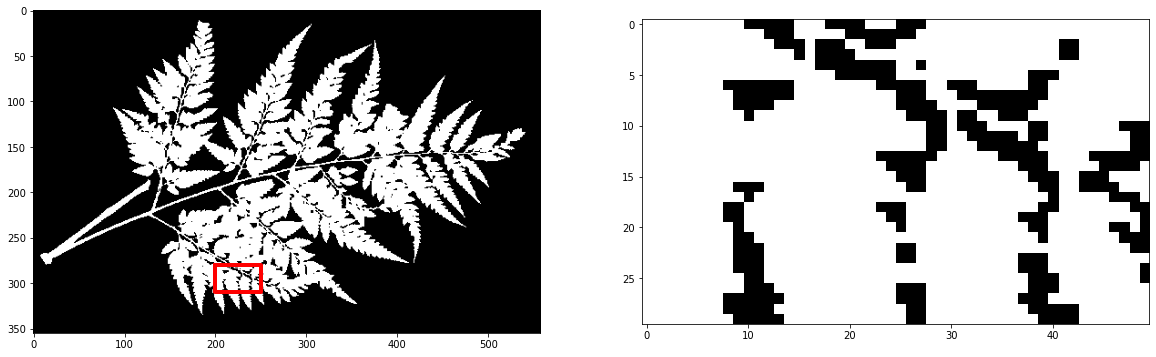

In [6]:
leaf_file = '../example_data/leafbw.tif'
leaf_img = tf.imread(leaf_file).T
leaf_img[leaf_img > 0] = 1

fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].imshow(leaf_img, cmap='gray');
ax[0].plot([200,200,250,250,200], [280,310,310,280,280], c='red', lw=4);
ax[1].imshow(leaf_img[280:310, 200:250], cmap='gray');

# Step 2: Complexify the image

- We'll work with the dual cubical complex: the pixels will be treated as vertices. 
- This complex corresponds to the 4-neighbor 2D digital topology.

<img src=https://www.egr.msu.edu/~amezqui3/barley/figs/cubical_complex.png width="900">

- The code works in linear time with respect to the number of image pixels/voxels

In [7]:
tic = time.perf_counter()
leaf = euler.CubicalComplex(leaf_img).complexify()
toc = time.perf_counter()

print("Complexify in {:.4f} seconds.\n\nCubical complex made of:".format(toc-tic))

leaf.summary();

Complexify in 1.3202 seconds.

Cubical complex made of:
53832	vertices
99196	edges
45167	squares
----
Euler Characteristic: -197


In [8]:
for i in range(len(leaf.cells)):
    print('{}-dim cells summarized in a {} numpy.array'.format(i, leaf.cells[i].shape))
    for j in range(6):
        print(j, '\t', leaf.cells[i][j,:])
    print('---')

0-dim cells summarized in a (53832, 2) numpy.array
0 	 [-168.10482613  -97.57746322]
1 	 [-167.10482613  -97.57746322]
2 	 [-167.10482613  -96.57746322]
3 	 [-166.10482613  -98.57746322]
4 	 [-166.10482613  -97.57746322]
5 	 [-166.10482613  -96.57746322]
---
1-dim cells summarized in a (99196, 2) numpy.array
0 	 [0 1]
1 	 [1 2]
2 	 [1 4]
3 	 [2 5]
4 	 [3 4]
5 	 [3 8]
---
2-dim cells summarized in a (45167, 4) numpy.array
0 	 [1 2 4 5]
1 	 [3 4 8 9]
2 	 [ 4  5  9 10]
3 	 [ 5  6 10 11]
4 	 [ 6  7 11 12]
5 	 [ 8  9 20 21]
---


### More details on complexifying images in `complexify_binary_image.ipynb`

- Alternatively, run the cell below and click the link

In [9]:
display.FileLink('../jupyter/07_complexify_binary_image.ipynb')

/home/ejam/documents/barley_stacks/demeter/jupyter/07_complexify_binary_image.ipynb

# Step 3: Choose directions

In [10]:
eq_angles = np.linspace(0, 2*np.pi, num=24, endpoint=False)
circle_dirs = np.column_stack((np.cos(eq_angles), np.sin(eq_angles)))
circle_dirs

array([[ 1.00000000e+00,  0.00000000e+00],
       [ 9.65925826e-01,  2.58819045e-01],
       [ 8.66025404e-01,  5.00000000e-01],
       [ 7.07106781e-01,  7.07106781e-01],
       [ 5.00000000e-01,  8.66025404e-01],
       [ 2.58819045e-01,  9.65925826e-01],
       [ 6.12323400e-17,  1.00000000e+00],
       [-2.58819045e-01,  9.65925826e-01],
       [-5.00000000e-01,  8.66025404e-01],
       [-7.07106781e-01,  7.07106781e-01],
       [-8.66025404e-01,  5.00000000e-01],
       [-9.65925826e-01,  2.58819045e-01],
       [-1.00000000e+00,  1.22464680e-16],
       [-9.65925826e-01, -2.58819045e-01],
       [-8.66025404e-01, -5.00000000e-01],
       [-7.07106781e-01, -7.07106781e-01],
       [-5.00000000e-01, -8.66025404e-01],
       [-2.58819045e-01, -9.65925826e-01],
       [-1.83697020e-16, -1.00000000e+00],
       [ 2.58819045e-01, -9.65925826e-01],
       [ 5.00000000e-01, -8.66025404e-01],
       [ 7.07106781e-01, -7.07106781e-01],
       [ 8.66025404e-01, -5.00000000e-01],
       [ 9.

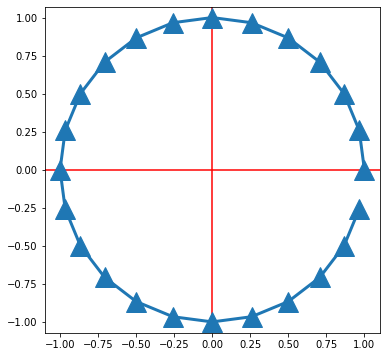

In [11]:
plt.figure(figsize=(6,6))
plt.axhline(0, color='red')
plt.axvline(0, color='red')
plt.plot(circle_dirs[:,0], circle_dirs[:,1], marker='^', ms=20, lw=3)
plt.axis('equal');

### Directions on 3D can be trickier. Check `sphere_directions.ipynb` for more details.

- Alternatively, run the cell below and click the link

In [12]:
display.FileLink('../jupyter/08_sphere_directions.ipynb')

/home/ejam/documents/barley_stacks/demeter/jupyter/08_sphere_directions.ipynb

# Step 4: Compute the Euler Characteristic Curve (ECC) along one direction

In [13]:
## Plot functions so that we do not clutter the next slides/cells

def plot_ecc(CComplex, filtration, T, title='title', ylim=(-30,30)):
    fig, ax = plt.subplots(2,3, figsize=(15,6))
    fig.suptitle('ECC for filter: {}'.format(title), fontsize=30)
    for j in range(2):
        for k in range(3):
            ax[j,k].plot((0,0),ylim, c='white')
            ax[j,k].set_ylabel('Euler characteristic', fontsize=12)
            ax[j,k].set_xlabel('Sublevel set', fontsize=12)
            ax[j,k].plot(CComplex.ECC(filtration, T[3*j+k]), 
                         lw=3, label = 'T = {}'.format(T[3*j+k]))
            ax[j,k].legend(fontsize=14)
    fig.tight_layout()

def plot_ecc_filtration(CComplex, filtration, T, TT=32, title='title', ylim=(-30,30)):
    bins = np.linspace(np.min(filtration), np.max(filtration), TT+1)
    indices = np.digitize(filtration, bins=bins, right=False)

    fig = plt.figure(constrained_layout=True, figsize=(20,7))
    gs = fig.add_gridspec(2,4)
    for j in range(2):
        for k in range(2):
            ax = fig.add_subplot(gs[j,k])
            ax.plot((0,0),ylim, c='white')
            ax.set_ylabel('Euler characteristic', fontsize=12)
            ax.set_xlabel('Sublevel set', fontsize=12)
            ax.plot(CComplex.ECC(filtration, T[2*j+k]), lw=5, label = 'T = {}'.format(T[2*j+k]))
            ax.legend(fontsize=20)
    ax = fig.add_subplot(gs[:,2:])
    scatter = ax.scatter(CComplex.cells[0][:,1], CComplex.cells[0][:,0], 
                         s=0.1, c=indices, cmap='magma', label='T = {}'.format(TT))
    ax.legend(fontsize=20)
    cbar = plt.colorbar(scatter, ax=ax, orientation='horizontal', pad=0.01);
    ax.axis('equal');
    cbar.ax.tick_params(labelsize=20)

    fig.suptitle('ECC for filter: {}'.format(title), fontsize=30);

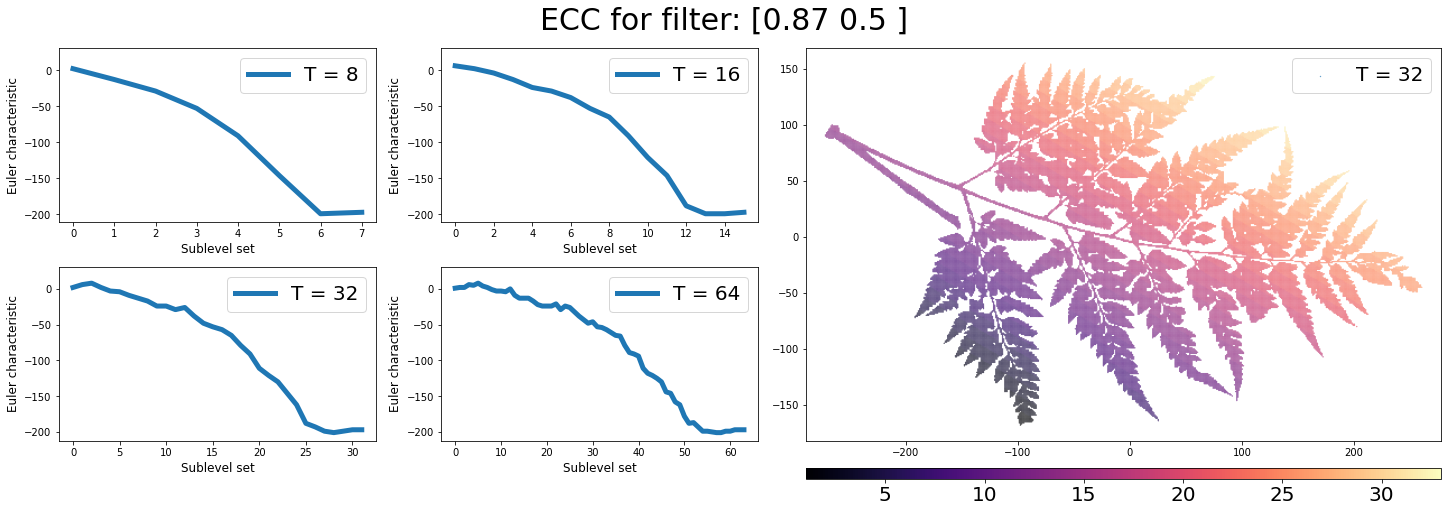

In [14]:
T = [8,16,32,64,128]
i = 2
direction = circle_dirs[i, :] 
heights = np.sum(leaf.cells[0]*direction, axis=1)
plot_ecc_filtration(leaf, heights, T, title=np.around(direction,2), ylim=(1,20))

# Step 5: Concatenate to get the Euler Characteristic Transform (ECT)

Complex with 53832 vertices

ECT with 24 directions in 0.1272 seconds.
0.0053s per direction


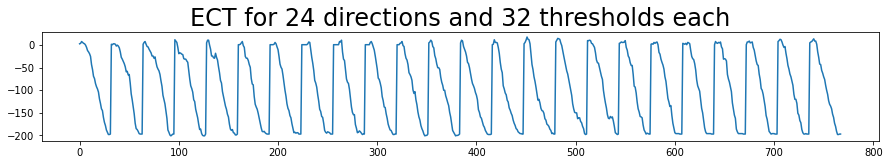

In [15]:
t = 32
tic = time.perf_counter()
ect = leaf.ECT(circle_dirs, T=t)
toc = time.perf_counter()
print("Complex with {} vertices\n".format(len(leaf.cells[0])))
print("ECT with {} directions in {:.4f} seconds.\n{:.4f}s per direction".format(len(circle_dirs), toc-tic, (toc-tic)/len(circle_dirs)))

plt.figure(figsize=(15,2))
plt.plot(ect);
plt.title('ECT for {} directions and {} thresholds each'.format(len(circle_dirs),t), fontsize=24);

### More details on how the ECT algorithm actually works in `ect_computation.ipynb`

- Alternatively, run the cell below and click the link

In [15]:
display.FileLink('../jupyter/09_ect_computation.ipynb')

/home/ejam/documents/barley_stacks/ect_and_barley/jupyter/ect_computation.ipynb

# Same run with 3D data

<img src=https://www.egr.msu.edu/~amezqui3/barley/figs/seeds_batch5b_transp.png width="350">

In [16]:
seed_file = '../example_data/seed_8_0_p7_d4_t120_o7_e1_g3.tif'
seed_img = tf.imread(seed_file)
seed_img[seed_img > 0] = 1

tic = time.perf_counter()
seed = euler.CubicalComplex(seed_img).complexify()
toc = time.perf_counter()

print("Complexify in {:.4f} seconds.\n\nCubical complex made of:".format(toc-tic))
seed.summary();

Complexify in 2.2978 seconds.

Cubical complex made of:
53631	vertices
154741	edges
148746	squares
47635	cubes
----
Euler Characteristic: 1


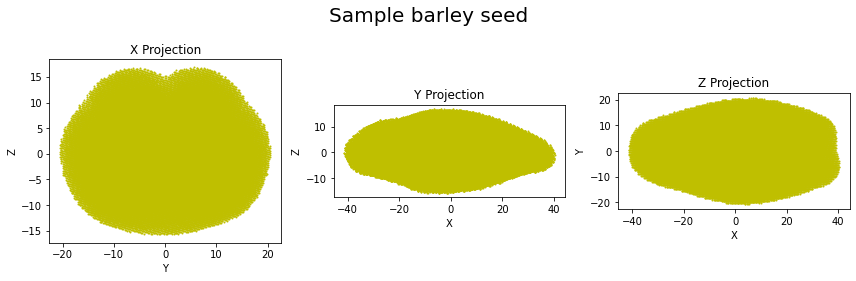

In [17]:
max_vox = misc.find_tip(seed.cells[0], 2,1,0)
seed_coords,_, _, _,_ = misc.rotateSVD(seed.cells[0], max_vox)

misc.plot_3Dprojections(seed_coords, 'Sample barley seed')

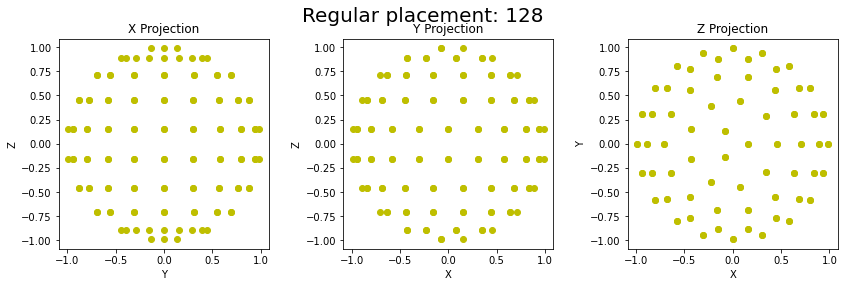

In [19]:
sphere_dirs = dirs.regular_directions(128)
title = 'Regular placement: {}'.format(len(sphere_dirs))
misc.plot_3Dprojections(sphere_dirs, title, markersize=12)

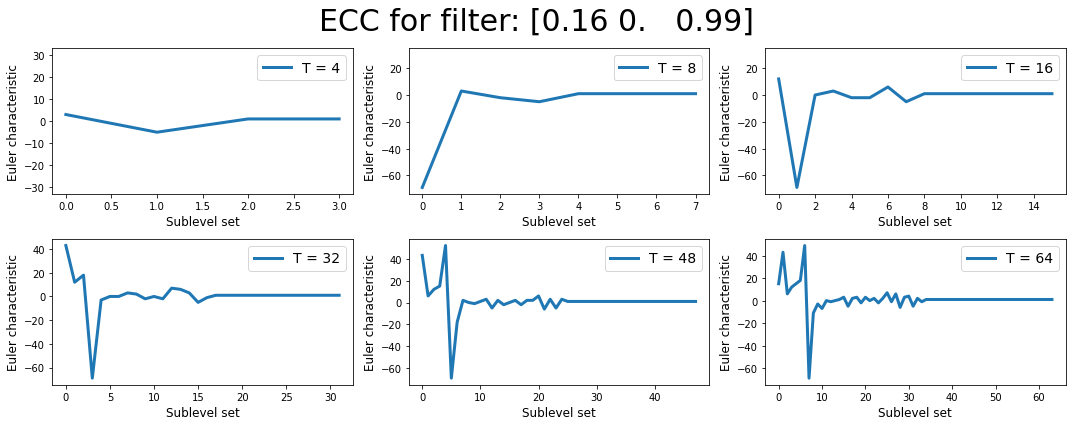

In [20]:
T = [4,8,16,32,48,64]
i = 0
direction = sphere_dirs[i,:]
heights = np.sum(seed_coords*direction, axis=1)

plot_ecc(seed, heights, T, title=np.around(direction,2))

Complex with 53631 vertices

ECT with 128 directions in 1.9659 seconds.
0.0154s per direction


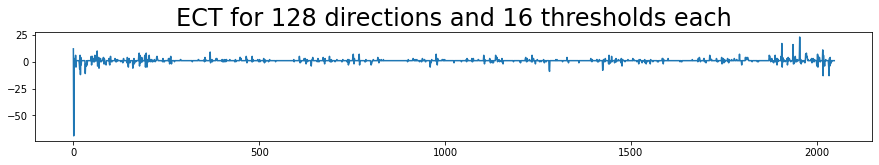

In [21]:
t = 16
tic = time.perf_counter()
ect = seed.ECT(sphere_dirs, T=t, verts=seed_coords)
toc = time.perf_counter()
print("Complex with {} vertices\n".format(len(seed_coords)))
print("ECT with {} directions in {:.4f} seconds.\n{:.4f}s per direction".format(len(sphere_dirs), toc-tic, (toc-tic)/len(sphere_dirs)))

plt.figure(figsize=(15,2))
plt.plot(ect);
plt.title('ECT for {} directions and {} thresholds each'.format(len(sphere_dirs),t), fontsize=24);

# Not limited to just directional filters

Shaped series: series shape does not match page shape


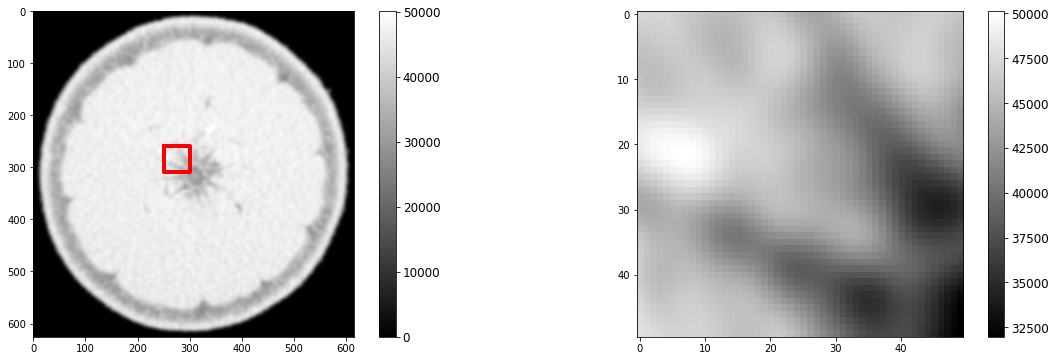

In [22]:
orange_file = '../example_data/orange_blur.tif'
orange_img = tf.imread(orange_file)

fig, ax = plt.subplots(1,2,figsize=(20,6))
show = ax[0].imshow(orange_img, cmap='gray');
cbar = plt.colorbar(show, ax=ax[0])
cbar.ax.tick_params(labelsize=12)
ax[0].plot([250,250,300,300,250], [260,310,310,260,260], c='red', lw=4)
show = ax[1].imshow(orange_img[260:310, 250:300], cmap='gray');
cbar = plt.colorbar(show, ax=ax[1], orientation='vertical');
cbar.ax.tick_params(labelsize=12);

In [23]:
tic = time.perf_counter()
orange = euler.CubicalComplex(orange_img).complexify()
toc = time.perf_counter()

print("Complexify in {:.4f} seconds.\n\nCubical complex made of:".format(toc-tic))
orange.summary();

Complexify in 6.8365 seconds.

Cubical complex made of:
303323	vertices
605401	edges
302079	squares
----
Euler Characteristic: 1


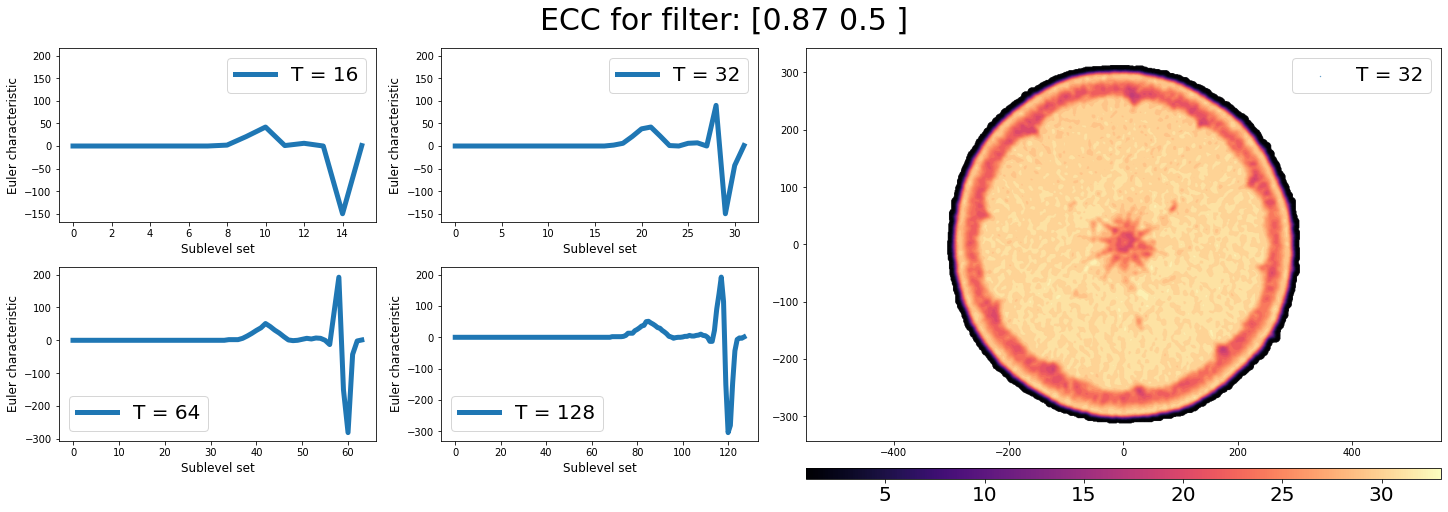

In [26]:
T = [16, 32, 64, 128, 256, 512]
i = 2
direction = circle_dirs[i, :]
#heights = np.sum(orange.cells[0]*direction, axis=1)
heights = orange.img[orange.img > 0]
title=np.around(direction,2)

#ylim = (0,3)
ylim = (0,200)
plot_ecc_filtration(orange, heights, T, title=title, ylim=ylim)

Complex with 303323 vertices

ECT with 24 directions in 0.7543 seconds.
0.0314s per direction


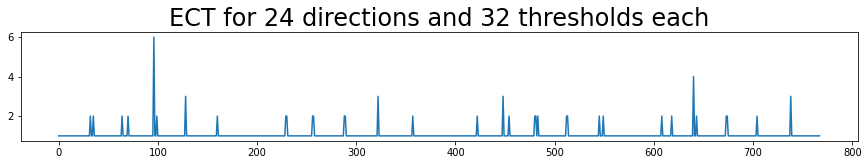

In [27]:
t = 32
tic = time.perf_counter()
ect = orange.ECT(circle_dirs, T=t)
toc = time.perf_counter()
print("Complex with {} vertices\n".format(len(orange.cells[0])))
print("ECT with {} directions in {:.4f} seconds.\n{:.4f}s per direction".format(len(circle_dirs), toc-tic, (toc-tic)/len(circle_dirs)))

plt.figure(figsize=(15,2))
plt.plot(ect);
plt.title('ECT for {} directions and {} thresholds each'.format(len(circle_dirs), t), fontsize=24);

## Even more filters

In [28]:
def radial_distance(coords):
    return np.sqrt(np.sum(coords**2, axis=1))
def distance_transform(img):
    dtc = ndimage.distance_transform_cdt(img, metric='taxicab')
    return dtc[img > 0]

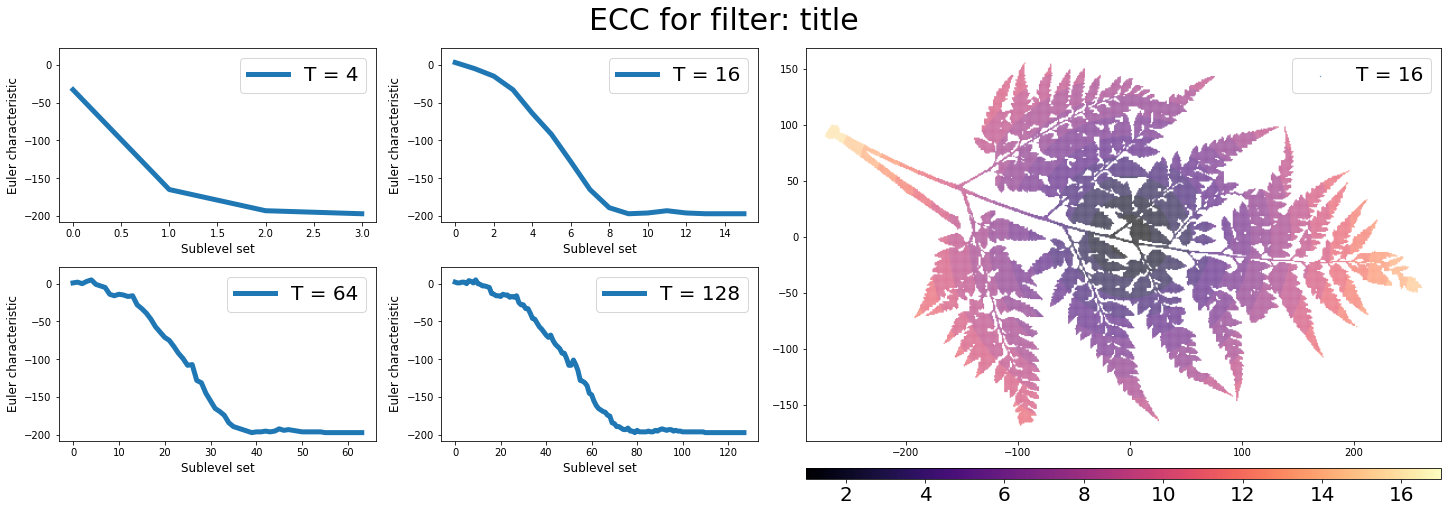

In [29]:
T = [4,16,64,128]
filtration = radial_distance(leaf.cells[0])
ylim = (0,12)
#T = [4,8,16,32]
#filtration = distance_transform(leaf.img)
#ylim = (-10,15)

plot_ecc_filtration(leaf, filtration, T, TT=16, ylim=ylim)

# What next?

- Every shape can be translated to a vector of topological features
- You can try to do standard statistics and data analysis

# Be aware of the curse of dimensionality

<img src=https://www.egr.msu.edu/~amezqui3/barley/figs/curse_of_dimensionality.png width="700">

- The ECT produces extremely long (high-dimensional) vectors
- Long vectors can distort regressions and classifications
- It is important to do dimension reduction first
    - PCA
    - Nonlinear PCA
    - t-SNE
    - etc

## Our pipeline (in R) for barley seeds can be found here 

- Available both as a jupyteR notebook and an R script file


- First we reduce dimension with kernel PCA
- Then we train a support vector machine

In [30]:
display.FileLink('../jupyter/10_shape_descriptor_classification.ipynb')

/home/ejam/documents/barley_stacks/demeter/jupyter/10_shape_descriptor_classification.ipynb

- Next we evaluate how accurate the SVM is

In [31]:
display.FileLink('../jupyter/12_shape_descriptor_analysis.ipynb')

/home/ejam/documents/barley_stacks/demeter/jupyter/12_shape_descriptor_analysis.ipynb

## Go crazy!

- Experiment with different number of directions
- And different ways to define directions


- What other filter functions can you think of?

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:white;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}

</style>

# Thank you!

- Joint work with [Dan Chitwood](https://dhchitwood.wixsite.com/morphologylab/publications) and [Liz Munch](http://www.elizabethmunch.com/) at CMSE/Horticulture/Math @ Michigan State University
- Image processing/computational tips from [Tim Ophelders](https://www.win.tue.nl/~tophelde/)
- X-ray CT scans done by [Michelle Quigley](https://www.canr.msu.edu/people/michelle-quigley)
- Barley seeds generously provided by [Dan Koenig](https://koeniglab.com/) and [Jacob Landis](https://jacoblandis.com/)
- Citrus generously provided by [Danelle Seymour](https://www.seymour-lab.com/)
- Fern leaf 2D scan courtesy of [Rebecca Dikow](https://datascience.si.edu/people/dr-rebecca-dikow) and [Alexander White](http://www.alexwhitebiology.com/).

<table class="tg">

<tbody>
  <tr>
    <td class="tg-baqh">
        <img src = "https://evacenteno.com/wp-content/uploads/2015/08/icon-blue-email-294x300.png" alt = "email icon" style="width:30px;"/>
        <a href="mailto:amezqui3@msu.edu">amezqui3@msu.edu</a>
    </td>
    <td class="tg-baqh">
        <img src = "https://www.flaticon.com/svg/static/icons/svg/975/975645.svg" alt = "Website icon" style="width:30px;"/>
        <a href="http://egr.msu.edu/~amezqui3">egr.msu.edu/~amezqui3</a>
    </td>
    <td>
        <img src="https://www.nsf.gov/images/logos/NSF_4-Color_vector_Logo_thumb.jpg" alt="NSF Logo" style="width:80px">
      </td>
          <td>
        <img src="https://cmse.msu.edu/sites/_cmse/assets/Image/image002.jpg" alt="MSU CMSE Logo" style="width:80px">
      </td>
       
  </tr>
</tbody>
</table>